<Axes: xlabel='petal_length', ylabel='petal_width'>

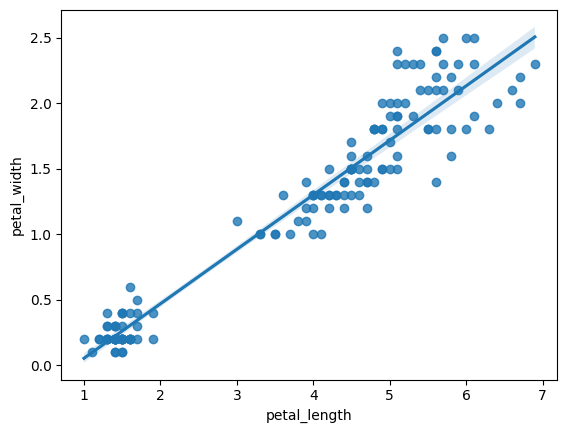

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np

iris = sns.load_dataset('iris')

# Defaults to the mean for the plot
sns.regplot(data=iris, x='petal_length', y='petal_width')

# Covariance
- $\frac{1}{n}\sum_{i=0}^{n}(x_i - \mu_x)(y_i - \mu_y)$

# Correlation
- If one value changes how much does it affect the other variable from -1 to 1
- $\frac{1}{n}\sum_{i=0}^{n}(\frac{x_1 - \mu_x}{\sigma_x})(\frac{y_i - \mu_y}{\sigma_y})$

# Expected Value
- Allows you to deal with weighted averages
- Same equation for the y values as well
- $E[x] = \frac{1}{n}\sum_{i=0}^{n}x_i P(x_i)$

# Variance for expected values
- $Var(X) = E[X^2] - (E[X])^2$
- Let $\bar{X} = X - E[X]$ and $\bar{Y} = Y - E[Y]$
- $cov(X,Y) = E[\bar{X}, \bar{Y}] = \frac{\bar{X} * \bar{Y}}{n}$ (Dot Product)
- $corr(x,y) = \frac{cov(x,y)}{\sigma_x, \sigma_y} = \frac{\bar{X} \bar{Y}}{||\bar{X}||, ||\bar{Y}||}$

# Norm of a vector (just the length of the vector)
- $||(x,y,z)|| = \sqrt{x^2 * y^2 * z^2}$

# Equation for the regrssion line (only needs the first b and x the extras lead to multi linear regression)
- $y = b_0 + b_1 x_1 + b_2 x_2 ...$
- b_0 is the bias = $Y.mean() - b1 * X.mean()$
- b_1 is the weight = $\frac{\bar{X} * \bar{Y}}{||\bar{X}|| ||\bar{Y}||}$ = $\frac{\bar{X} * \bar{Y}}{||\bar{X}||^2}$ (dot products) = $\frac{\bar{X} * \bar{Y}}{\bar{X} * \bar{X}}$
- $||\bar{X}||^2$ = $\bar{X} * \bar{X}$ (dot product)

In [35]:
A = np.array([2, 3, 4])
B = np.array([16, 10, 7])

print(f"var(A) = {np.var(A)}, var(B) = {np.var(B)}")
print(f"cov(A,B) = \n{np.cov(A,B,ddof=1)}")

var(A) = 0.6666666666666666, var(B) = 14.0
cov(A,B) = 
[[ 1.  -4.5]
 [-4.5 21. ]]


In [36]:
A_bar = A - A.mean()
B_bar = B - B.mean()

print(f"vector a of the average: {A_bar}, vector b of the average: {B_bar}")

A_dot_B = A_bar.dot(B_bar)
print(f"the dot product of a and b: {A_dot_B/2}")

vector a of the average: [-1.  0.  1.], vector b of the average: [ 5. -1. -4.]
the dot product of a and b: -4.5


In [37]:
print(f"the correlation of a and b: \n{np.corrcoef(A_bar, B_bar)}")

the correlation of a and b: 
[[ 1.         -0.98198051]
 [-0.98198051  1.        ]]


In [38]:
np.cov(iris['petal_length'], iris['petal_width'])

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [39]:
np.corrcoef(iris['petal_length'], iris['petal_width'])

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [40]:
b1 = iris['petal_length'].dot(iris['petal_width']) / iris['petal_length'].dot(iris['petal_length'])
b0 = iris['petal_width'].mean() - b1 * iris['petal_length'].mean()

print(f"y = b0: {b0:0.3f} + b1: {b1:0.3f}x")

y = b0: -0.065 + b1: 0.337x


<Axes: xlabel='petal_length', ylabel='petal_width'>

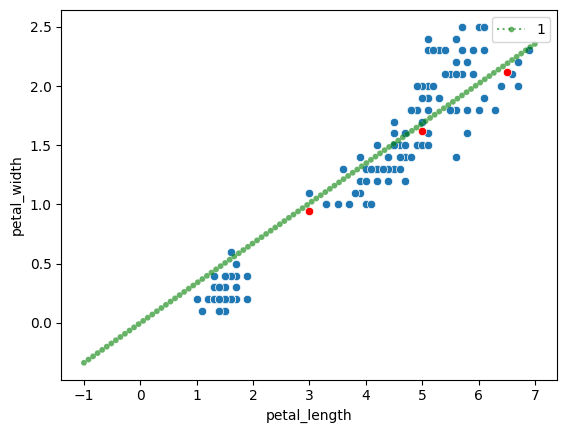

In [41]:
x_test = np.array([3, 5, 6.5])
y_pred = b0 + b1 * x_test

x_line = np.linspace(-1, 7, 100)
y_line = b0 = b1 * x_line

sns.scatterplot(data=iris, x='petal_length', y="petal_width")
sns.scatterplot(x=x_test, y=y_pred, color='red')
sns.scatterplot(x=x_line, y=y_line, color='green', linestyle=':', size=1, alpha=0.6)

In [45]:
A = np.array([2, 3, 4])
B = np.array([16, 10, 7])

A_bar = A - A.mean()
B_bar = B - B.mean()

print(f"A_bar: {A_bar}, A avg: {A.mean()}")
print(f"B_bar: {B_bar}, B avg: {B.mean()}")

b1 = A_bar.dot(B_bar) / A_bar.dot(A_bar)
b0 = B.mean() - b1 * A.mean()

print(f"y = b0: {b0:0.3f} + b1: {b1:0.3f}x")

A_bar: [-1.  0.  1.], A avg: 3.0
B_bar: [ 5. -1. -4.], B avg: 11.0
y = b0: 24.500 + b1: -4.500x


<Axes: >

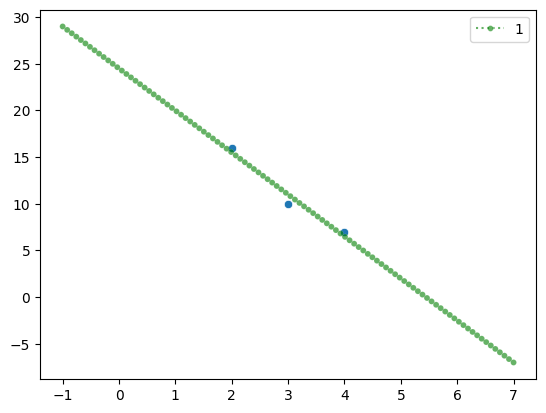

In [43]:
x_line = np.linspace(-1, 7, 100)
y_line = b0 + b1 * x_line

sns.scatterplot(x=A, y=B)
sns.scatterplot(x=x_line, y=y_line, color='green', linestyle=':', size=1, alpha=0.6)